In [1]:
from santa_modelling import np, pd, plt, sns, setJupyterNotebook, title
from santa_modelling import Explore,Split,OHE,Balance,SetIndex, FeatureScale, FeatureScaleAll
from santa_modelling import ClassificationModelDictionary, RunAll,Classify
import santa_modelling
#print(dir(santa_modelling))
setJupyterNotebook()

In [2]:
url = 'Bank_Personal_Loan_before_encoding.csv' # 'bank_personal_loan_modelling_OHE.csv'
df=pd.read_csv(url)
index = 'ID';target = 'Personal Loan'
non_features = [index,target]

In [3]:
df.head()

,ID,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Education_cat
0,1,25,1,49.000,4,1.600,1,0.000,No,Undergrad
1,2,45,19,34.000,3,1.500,1,0.000,No,Undergrad
2,3,39,15,11.000,1,1.000,1,0.000,No,Undergrad
3,4,35,9,100.000,1,2.700,2,0.000,No,Graduate
4,5,35,8,45.000,4,1.000,2,0.000,No,Graduate


In [4]:
data = Split(df,target=target)

In [5]:
data,OHE_features=OHE(data=data,non_features=non_features,cat_features=None)

Checking Imbalance
No    0.906
Yes   0.094
Name: Personal Loan, dtype: float64
Do You Want to Treat Data?
Press "y" or "n" 
y
Treating Imbalance on Train Data
After Balancing
Yes   0.500
No    0.500
Name: Personal Loan, dtype: float64
* *


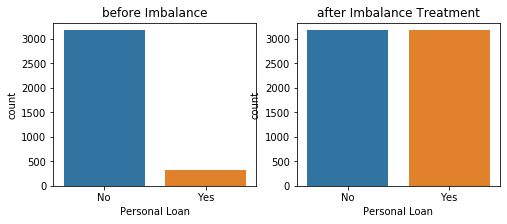

In [6]:
data = Balance(data = data)

In [7]:
data = SetIndex(data=data, index=index) # setting index before modeling

In [8]:
data[0].head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Education_cat_Advanced/Professional,Education_cat_Graduate,Education_cat_Undergrad
ID,,,,,,,,,,
4216.000,64.000,40.000,21.000,2.000,0.300,3.000,0.000,1.000,0.000,0.000
3848.000,43.000,18.000,94.000,4.000,1.100,2.000,0.000,0.000,1.000,0.000
3140.000,52.000,26.000,95.000,1.000,0.300,1.000,0.000,0.000,0.000,1.000
4359.000,35.000,11.000,75.000,4.000,2.000,3.000,79.000,1.000,0.000,0.000
502.000,50.000,26.000,39.000,3.000,1.900,2.000,0.000,0.000,1.000,0.000


In [9]:
models = ClassificationModelDictionary()
# modelling without scaling
unscaled_data = data
trained_models, unscaled = RunAll(models=models,data=unscaled_data,phase='unscaled',
                                  scores=None,trained_models = {},use_params=False)
# modelling after the MINMAX scaling all columns irrespective of numerical or OHE columns
minmaxAll_data = FeatureScaleAll(data,scaler='MinMaxScaler')
trained_models, MinMaxAll = RunAll(models=models,data=minmaxAll_data,phase='MinMaxAll',
                                scores=None,trained_models = {},use_params=False)
# modelling after the Z-Score scaling all columns irrespective of numerical or OHE columns
zcoreAll_data = FeatureScaleAll(data,scaler='StandardScaler')
trained_models, ZscoreAll = RunAll(models=models,data=zcoreAll_data,phase='ZscoreAll',
                                scores=None,trained_models = {},use_params=False)
# modelling after the MINMAX scaling on numerical columns only discarding OHE columns to scale
minmax_data = FeatureScale(data,OHE_features=OHE_features,scaler='MinMaxScaler')
trained_models, MinMax = RunAll(models=models,data=minmax_data,phase='MinMax',
                                scores=None,trained_models = {},use_params=False)
# modelling after the Z-Score scaling on numerical columns only discarding OHE columns to scale
zcore_data = FeatureScale(data,OHE_features=OHE_features,scaler='StandardScaler')
trained_models, Zscore = RunAll(models=models,data=zcore_data,phase='Zscore',
                                scores=None,trained_models = {},use_params=False)
scores = pd.concat([unscaled,MinMaxAll,ZscoreAll,MinMax,Zscore],axis=0).sort_values(['AUC_ROC','Recall'], ascending=False)
scores.head(10)

Applying MinMaxScaler
Applying StandardScaler
Applying MinMaxScaler
Applying StandardScaler


,Model,Phase,AUC_ROC,TrainingAccuracy,TestingAccuracy,Recall,Precision,F1_Score,FalsePositives,FalseNegatives
0,RandomForestClassifier,unscaled,0.965,1.000,0.991,0.933,0.972,0.952,4,10
0,BaggingClassifier,MinMaxAll,0.960,1.000,0.987,0.927,0.946,0.936,8,11
0,GradientBoostingClassifier,unscaled,0.960,0.995,0.987,0.927,0.939,0.933,9,11
0,GradientBoostingClassifier,MinMaxAll,0.960,0.995,0.987,0.927,0.939,0.933,9,11
0,GradientBoostingClassifier,ZscoreAll,0.960,0.995,0.987,0.927,0.939,0.933,9,11
0,GradientBoostingClassifier,MinMax,0.960,0.995,0.987,0.927,0.939,0.933,9,11
0,GradientBoostingClassifier,Zscore,0.960,0.995,0.987,0.927,0.939,0.933,9,11
0,LGBMClassifier,unscaled,0.959,1.000,0.991,0.920,0.986,0.952,2,12
0,HistGradientBoostingClassifier,unscaled,0.959,1.000,0.991,0.920,0.986,0.952,2,12
0,HistGradientBoostingClassifier,MinMaxAll,0.959,1.000,0.991,0.920,0.986,0.952,2,12


In [10]:
from datetime import datetime; import pickle
DataModelScores = dict(data=data,trained_models=trained_models,modelsDict=models,scores=scores)
time = datetime.now().strftime('%Y_%b_%d_%H_%M_%S')
pickle.dump(DataModelScores, open('{}_DataModelScores.pkl'.format(time), 'wb'))
DataModelScores = pickle.load(open(f'{time}_DataModelScores.pkl', 'rb'))

In [11]:
scores_selected = scores.head(10)
scores_selected

,Model,Phase,AUC_ROC,TrainingAccuracy,TestingAccuracy,Recall,Precision,F1_Score,FalsePositives,FalseNegatives
0,RandomForestClassifier,unscaled,0.965,1.000,0.991,0.933,0.972,0.952,4,10
0,BaggingClassifier,MinMaxAll,0.960,1.000,0.987,0.927,0.946,0.936,8,11
0,GradientBoostingClassifier,unscaled,0.960,0.995,0.987,0.927,0.939,0.933,9,11
0,GradientBoostingClassifier,MinMaxAll,0.960,0.995,0.987,0.927,0.939,0.933,9,11
0,GradientBoostingClassifier,ZscoreAll,0.960,0.995,0.987,0.927,0.939,0.933,9,11
0,GradientBoostingClassifier,MinMax,0.960,0.995,0.987,0.927,0.939,0.933,9,11
0,GradientBoostingClassifier,Zscore,0.960,0.995,0.987,0.927,0.939,0.933,9,11
0,LGBMClassifier,unscaled,0.959,1.000,0.991,0.920,0.986,0.952,2,12
0,HistGradientBoostingClassifier,unscaled,0.959,1.000,0.991,0.920,0.986,0.952,2,12
0,HistGradientBoostingClassifier,MinMaxAll,0.959,1.000,0.991,0.920,0.986,0.952,2,12


In [12]:
for_CV = {phase:list(scores_selected[scores_selected.Phase==phase].Model.unique())\
                  for phase in scores_selected.Phase.unique()}

In [13]:
models = ClassificationModelDictionary()

models = {models[i]['name']:[models[i]['model'],models[i]['cv_params'],models[i]['best_parameters']]for i in models}
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer,accuracy_score, recall_score
scoring = {'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score)}

for phase in for_CV.keys():
    if phase == 'unscaled':
        print(f'Selecting {phase} data');print(123*'*')
        unscaled_data = data
        for name in for_CV[phase]:
            model = models[name][0]
            parameters = models[name][1]
            print('Selecting Model:',name,'\nWith Param Dict:',parameters)

            cv = GridSearchCV(estimator=model, param_grid=parameters,cv=10,scoring=scoring,
                              refit='AUC',return_train_score=True)
            cv.fit(unscaled_data[0],unscaled_data[2])
            models[name][2][phase]=cv.best_params_
            print('Best Parameters: ------->',models[name][2]);print(123*'-')
    elif phase == 'ZscoreAll':
        print(f'Selecting {phase} data');print(123*'*')
        zcoreAll_data = FeatureScaleAll(data,scaler='StandardScaler')
        for name in for_CV[phase]:
            model = models[name][0]
            parameters = models[name][1]
            print('Selecting Model:',name,'\nWith Param Dict:',parameters)

            cv = GridSearchCV(estimator=model, param_grid=parameters,cv=10,scoring=scoring,
                              refit='AUC',return_train_score=True)
            cv.fit(zcoreAll_data[0],zcoreAll_data[2])
            models[name][2][phase]=cv.best_params_
            print('Best Parameters: ------->',models[name][2]);print(123*'-')
    elif phase == 'Zscore':
        print(f'Selecting {phase} data');print(123*'*')
        zcore_data = FeatureScale(data,OHE_features=OHE_features,scaler='StandardScaler')
        for name in for_CV[phase]:
            model = models[name][0]
            parameters = models[name][1]
            print('Selecting Model:',name,'\nWith Param Dict:',parameters)

            cv = GridSearchCV(estimator=model, param_grid=parameters,cv=10,scoring=scoring,
                              refit='AUC',return_train_score=True)
            cv.fit(zcore_data[0],zcore_data[2])
            models[name][2][phase]=cv.best_params_
            print('Best Parameters: ------->',models[name][2]);print(123*'-')
    elif phase == 'MinMaxAll':
        print(f'Selecting {phase} data');print(123*'*')
        minmaxAll_data = FeatureScaleAll(data,scaler='MinMaxScaler')
        for name in for_CV[phase]:
            model = models[name][0]
            parameters = models[name][1]
            print('Selecting Model:',name,'\nWith Param Dict:',parameters)

            cv = GridSearchCV(estimator=model, param_grid=parameters,cv=10,scoring=scoring,
                              refit='AUC',return_train_score=True)
            cv.fit(minmaxAll_data[0],minmaxAll_data[2])
            models[name][2][phase]=cv.best_params_
            print('Best Parameters: ------->',models[name][2]);print(123*'-')
    elif phase == 'MinMax':
        print(f'Selecting {phase} data');print(123*'*')
        minmax_data = FeatureScale(data,OHE_features=OHE_features,scaler='MinMaxScaler')
        for name in for_CV[phase]:
            model = models[name][0]
            parameters = models[name][1]
            print('Selecting Model:',name,'\nWith Param Dict:',parameters)

            cv = GridSearchCV(estimator=model, param_grid=parameters,cv=10,scoring=scoring,
                              refit='AUC',return_train_score=True)
            cv.fit(minmax_data[0],minmax_data[2])
            models[name][2][phase]=cv.best_params_
            print('Best Parameters: ------->',models[name][2]);print(123*'-')


Selecting unscaled data
***************************************************************************************************************************
Selecting Model: RandomForestClassifier 
With Param Dict: {'max_depth': [2, 3, 4], 'bootstrap': [True, False], 'max_features': ['auto', 'sqrt', 'log2', None], 'criterion': ['gini', 'entropy'], 'random_state': [8]}
Best Parameters: -------> {'unscaled': {'bootstrap': True, 'criterion': 'gini', 'max_depth': 4, 'max_features': None, 'random_state': 8}}
---------------------------------------------------------------------------------------------------------------------------
Selecting Model: GradientBoostingClassifier 
With Param Dict: {'loss': ['deviance', 'exponential'], 'n_estimators': [100], 'random_state': [0, 8]}
Best Parameters: -------> {'unscaled': {'loss': 'deviance', 'n_estimators': 100, 'random_state': 0}}
---------------------------------------------------------------------------------------------------------------------------
Sele

In [14]:
cv_selected_models = {i:[models[i][0],models[i][2]] for i in models.keys() if models[i][2] != {}}
print('Best Models are'.center(100,'-'))
for key in cv_selected_models.keys():print(key,'with data',*cv_selected_models[key][1])

------------------------------------------Best Models are-------------------------------------------
RandomForestClassifier with data unscaled
BaggingClassifier with data MinMaxAll
GradientBoostingClassifier with data unscaled MinMaxAll ZscoreAll MinMax Zscore
LGBMClassifier with data unscaled
HistGradientBoostingClassifier with data unscaled MinMaxAll


In [15]:
scores = pd.DataFrame(columns=['Model','Phase','AUC_ROC','TrainingAccuracy','TestingAccuracy',
                               'Recall','Precision','F1_Score','FalsePositives','FalseNegatives'])
for key in cv_selected_models.keys():
    phases = list(cv_selected_models[key][1].keys())
    for phase in phases:
        if phase == 'unscaled':data_phase = data
        elif phase == 'ZscoreAll':data_phase = FeatureScaleAll(data,scaler='StandardScaler')
        elif phase == 'Zscore':data_phase = FeatureScale(data,OHE_features=OHE_features,scaler='StandardScaler')
        elif phase == 'MinMaxAll':data_phase = FeatureScaleAll(data,scaler='MinMaxScaler')
        elif phase == 'MinMax':data_phase = FeatureScale(data,OHE_features=OHE_features,scaler='MinMaxScaler')
        parameters = cv_selected_models[key][1][phase]
        model =  cv_selected_models[key][0]
        model.set_params(**parameters)
        scores = Classify(algorithm=key,model=model,data=data_phase,phase=phase,scores=scores)
scores.sort_values('AUC_ROC',ascending=False)

Applying MinMaxScaler
Applying MinMaxScaler
Applying StandardScaler
Applying MinMaxScaler
Applying StandardScaler
Applying MinMaxScaler


,Model,Phase,AUC_ROC,TrainingAccuracy,TestingAccuracy,Recall,Precision,F1_Score,FalsePositives,FalseNegatives
0,BaggingClassifier,MinMaxAll,0.961,1.000,0.989,0.927,0.965,0.946,5,11
0,GradientBoostingClassifier,unscaled,0.960,0.995,0.987,0.927,0.939,0.933,9,11
0,GradientBoostingClassifier,MinMaxAll,0.960,0.995,0.987,0.927,0.939,0.933,9,11
0,GradientBoostingClassifier,ZscoreAll,0.960,0.995,0.987,0.927,0.939,0.933,9,11
0,GradientBoostingClassifier,MinMax,0.960,0.995,0.987,0.927,0.939,0.933,9,11
0,GradientBoostingClassifier,Zscore,0.960,0.995,0.987,0.927,0.939,0.933,9,11
0,HistGradientBoostingClassifier,unscaled,0.959,1.000,0.991,0.920,0.986,0.952,2,12
0,HistGradientBoostingClassifier,MinMaxAll,0.959,1.000,0.991,0.920,0.986,0.952,2,12
0,LGBMClassifier,unscaled,0.956,1.000,0.990,0.913,0.986,0.948,2,13
0,RandomForestClassifier,unscaled,0.954,0.983,0.981,0.920,0.890,0.905,17,12


> NOTES:
* Bagging Classifer and Gradient Boosting Classier are the models which will be presented with merits and de-merits to the client
* Bagging Classfier will reduce the cost of contacting customers compared to GB since it predicts less False positives. But the data has to be scaled
* Though Bagging Classifer Model is high in AUC_ROC. it is slightly overfit
* Gradient Boosting classifer is stable in predicing even scaled or non-scaled data. It can reduce Computation cost. Also GB is less overfit when compared to Bagging Classifer

In [66]:
coeffs = pd.Series(trained_models['LogisticRegressionZscore'].coef_[0],
          index=data[0].columns, name='FeatureImportances').sort_values(ascending=False)
FeatureImportances =pd.Series(trained_models['DecisionTreeClassifierZscore'].feature_importances_,
          index=data[0].columns, name='FeatureImportances').sort_values(ascending=False)